<a href="https://colab.research.google.com/github/hemakumar5153/cnn-optimization/blob/main/Copy_of_capstone_MNIST_all_optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar100
import numpy

In [ ]:
import keras
from google.colab import files
from keras.models import Model
from keras.layers import *
from keras.models import Model, load_model
from keras import initializers
from keras import optimizers
from google.colab import drive
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Label: 0


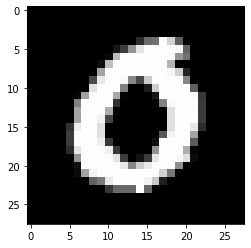

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# expand new axis, channel axis 
X_train = np.expand_dims(X_train, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
X_train = np.repeat(X_train, 3, axis=-1)

In [ ]:
# it's always better to normalize 
X_train = X_train.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
X_train = tf.image.resize(X_train, [32,32]) # if we want to resize 

In [ ]:
print(X_train.shape)

(60000, 32, 32, 3)


In [ ]:
# expand new axis, channel axis 
X_test = np.expand_dims(X_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
X_test = np.repeat(X_test, 3, axis=-1)

In [ ]:
# it's always better to normalize 
X_test = X_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
X_test = tf.image.resize(X_test, [32,32]) # if we want to resize 

In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (60000, 32, 32, 3)
Images in X_train: 60000
Images in X_test: 10000


In [ ]:
print("Max value in X_train:", X_train.numpy().max())
print("Min value in X_train:", X_train.numpy().min())

Max value in X_train: 1.0
Min value in X_train: 0.0


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# X_train /= 255
# X_test /= 255

In [ ]:
# print("X_train shape:", X_train.shape)
# print("Images in X_train:", X_train.shape[0])
# print("Images in X_test:", X_test.shape[0])
# print("Max value in X_train:", X_train.max())
# print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

# print("Shape of y_train:", y_train.shape)
# print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta,Adagrad,Adam,RMSprop,SGD

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Conv2D

## CUSTOM MODEL 1

In [ ]:
def build_model(optimizer):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28,28,1)))
  model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return model

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  model = build_model(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=model.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3985 - accuracy: 0.8851 - val_loss: 0.2837 - val_accuracy: 0.9069
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1657 - accuracy: 0.9500 - val_loss: 0.1636 - val_accuracy: 0.9498
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1208 - accuracy: 0.9636 - val_loss: 0.1434 - val_accuracy: 0.9563
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0972 - accuracy: 0.9699 - val_loss: 0.1304 - val_accuracy: 0.9618
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0681 - accuracy: 0.9793 - val_loss: 0.0997 - val_accuracy: 0.9709
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/ste

## CUSTOM MODEL 2

In [ ]:
def build_model1(optimizer):
  model=Sequential()
  model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28, 28, 1)))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return model

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  model = build_model1(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=model.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1313/1313 [==============================] - 22s 7ms/step - loss: 1.2994 - accuracy: 0.5436 - val_loss: 0.2679 - val_accuracy: 0.9320
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3415 - accuracy: 0.8923 - val_loss: 0.1459 - val_accuracy: 0.9578
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2292 - accuracy: 0.9292 - val_loss: 0.1096 - val_accuracy: 0.9691
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1817 - accuracy: 0.9420 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1552 - accuracy: 0.9514 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1332 - accuracy: 0.9580 - val_loss: 0.0800 - val_accuracy: 0.9748
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/st

## VGG19

In [ ]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train.shape,X_test.shape

((60000, 28, 84, 1), (10000, 28, 84, 1))

In [ ]:
# Reshape images as per the tensor format required by tensorflow

X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
vgg19 = VGG19(include_top=False,input_shape=(32,32,3))
print(vgg19.summary())

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
def ModelVGG19(optimizer):
  modelvgg19=Sequential()
  for layer in vgg19.layers:
    modelvgg19.add(layer)

  for layer in modelvgg19.layers:
    layer.trainable=False

  modelvgg19.add(Flatten())
  modelvgg19.add(Dense(128))
  modelvgg19.add(Dense(10,activation='softmax'))
  modelvgg19.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelvgg19



In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelvgg19 = ModelVGG19(i)
  hist=modelvgg19.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split = 0.3)
  m1=modelvgg19.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.9206 - accuracy: 0.7462 - val_loss: 0.5429 - val_accuracy: 0.8614
Epoch 2/5
1313/1313 [==============================] - 22s 16ms/step - loss: 0.4479 - accuracy: 0.8790 - val_loss: 0.3720 - val_accuracy: 0.9004
Epoch 3/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.3343 - accuracy: 0.9087 - val_loss: 0.2947 - val_accuracy: 0.9210
Epoch 4/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.2783 - accuracy: 0.9219 - val_loss: 0.2569 - val_accuracy: 0.9293
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2222 - accuracy: 0.9353

 Model test accuracy with SGD optimizer is 93.53% 


=================== Running with Adagrad Optimizer ====================

Epoch 1/5
1313/1313 [==============================] - 23s 17ms/step - loss: 1.4541 - accuracy: 0.6363 - val_loss: 1.1127 -

## VGG16

In [ ]:
vgg16 = VGG16(include_top=False,input_shape=(32,32,3))
print(vgg16.summary())


58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
def ModelVGG16(optimizer):
  modelvgg16=Sequential()
  for layer in vgg16.layers:
    modelvgg16.add(layer)

  for layer in modelvgg16.layers:
    layer.trainable=False

  modelvgg16.add(Flatten())
  modelvgg16.add(Dense(128))
  modelvgg16.add(Dense(10,activation='softmax'))
  modelvgg16.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelvgg16

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelvgg16 = ModelVGG16(i)
  hist=modelvgg16.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split = 0.3)
  m1=modelvgg16.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.9367 - accuracy: 0.7413 - val_loss: 0.5975 - val_accuracy: 0.8224
Epoch 2/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.4872 - accuracy: 0.8657 - val_loss: 0.4465 - val_accuracy: 0.8640
Epoch 3/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.3750 - accuracy: 0.8945 - val_loss: 0.3437 - val_accuracy: 0.8985
Epoch 4/5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.3178 - accuracy: 0.9088 - val_loss: 0.2976 - val_accuracy: 0.9129
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2537 - accuracy: 0.9300

 Model test accuracy with SGD optimizer is 93.00% 


=================== Running with Adagrad Optimizer ====================

Epoch 1/5
1313/1313 [==============================] - 19s 14ms/step - loss: 1.5159 - accuracy: 0.6012 - val_loss: 1.1515 -

## EFFICENT NET

In [ ]:
efnb0 = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet',include_top=False,input_shape=(32,32,3), classes=10)
print(efnb0.summary())

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization[0][0]']          
                    

In [ ]:
def ModelEFN(optimizer):
  modelefn=Sequential()
    
  modelefn.add(efnb0)
  modelefn.add(GlobalAveragePooling2D())
  modelefn.add(Dropout(0.5))
  modelefn.add(Dense(10, activation='softmax'))
  modelefn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelefn

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelefn = ModelEFN(i)
  hist=modelefn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=modelefn.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1313/1313 [==============================] - 59s 40ms/step - loss: 0.0814 - accuracy: 0.9879 - val_loss: 0.0382 - val_accuracy: 0.9918
Epoch 2/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.1445 - val_accuracy: 0.9630
Epoch 3/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0230 - accuracy: 0.9942 - val_loss: 0.0710 - val_accuracy: 0.9819
Epoch 4/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.0562 - val_accuracy: 0.9855
Epoch 5/10
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0178 - accuracy: 0.9955 - val_loss: 0.1503 - val_accuracy: 0.9570
Epoch 6/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.0586 - val_accuracy: 0.9843
Epoch 7/10
1313/1313 [==============================] 

In [ ]:
######################################################

# New Section